## Data Preprocessing Lab: Time Series and Text (NLP)

This lab covers two core preprocessing workflows:

1. Time Series preprocessing (indexing, resampling, handling missing data)
2. Text preprocessing (cleaning, tokenization, vectorization)

## Part 1: Time Series Preprocessing

We will use a synthetic dataset simulating daily temperature readings over several months.

In [1]:
import pandas as pd
import numpy as np

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-04-30', freq='D')
temperature = np.random.normal(loc=15, scale=5, size=len(date_rng))
df_ts = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df_ts.loc[np.random.choice(df_ts.index, 10), 'Temperature'] = np.nan  # add missing values
df_ts.set_index('Date', inplace=True)

df_ts.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-02,14.308678
2023-01-03,18.238443
2023-01-04,22.615149
2023-01-05,13.829233


### Plot the Time Series

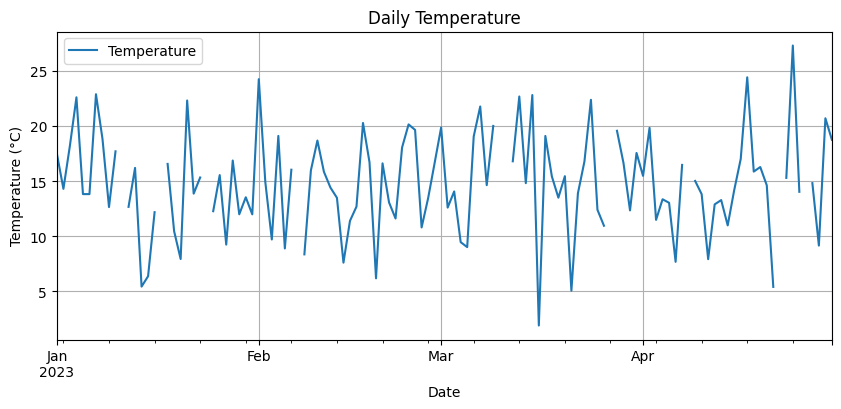

In [2]:
import matplotlib.pyplot as plt

df_ts.plot(figsize=(10, 4), title='Daily Temperature')
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

### Fill Missing Values and Resample

In [3]:
# Interpolate missing values
df_filled = df_ts.interpolate()

# Resample to weekly average
df_weekly = df_filled.resample('W').mean()

df_weekly.head()

,Temperature
Date,
2023-01-01,17.483571
2023-01-08,17.793437
2023-01-15,12.321097
2023-01-22,13.962489
2023-01-29,13.585505


### Exercise 1: Time Series Handling


- Count the number of missing values in `df_ts`
- Fill missing values using forward fill instead of interpolation
- Plot both original and filled time series for comparison


In [4]:
# TODO: Fill missing values using ffill
print("Valeurs manquantes :", df_ts.isna().sum())

df_ffill = df_ts.fillna(method='ffill')


Valeurs manquantes : Temperature    10
dtype: int64


/var/folders/m_/tdm20bm529133nsxryfg0n_40000gn/T/ipykernel_32418/2104966834.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ts.fillna(method='ffill')


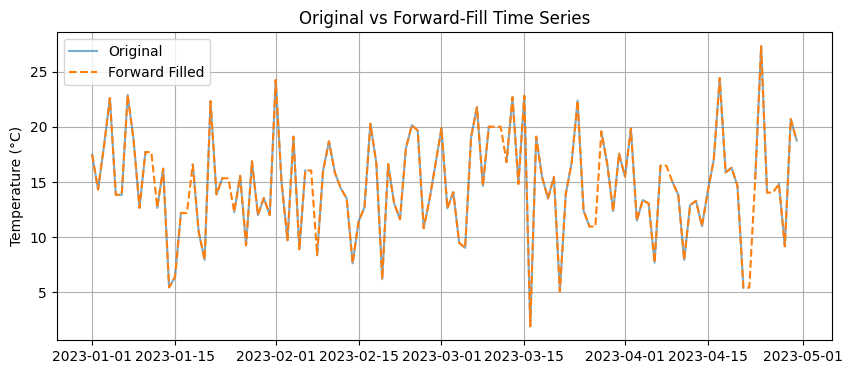

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df_ts, label='Original', alpha=0.6)
plt.plot(df_ffill, label='Forward Filled', linestyle='--')
plt.title('Original vs Forward-Fill Time Series')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


## Part 2: Text Preprocessing (NLP)

We will use a small corpus of text to explore common text preprocessing techniques.

In [6]:
documents = [
    "Natural Language Processing (NLP) is a subfield of AI.",
    "It focuses on understanding and generating human language.",
    "Text preprocessing is a crucial step in NLP pipelines.",
    "Common techniques include tokenization, stopword removal, and stemming."
]

### Basic Text Cleaning

In [7]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

cleaned_docs = [clean_text(doc) for doc in documents]
cleaned_docs

['natural language processing nlp is a subfield of ai',
 'it focuses on understanding and generating human language',
 'text preprocessing is a crucial step in nlp pipelines',
 'common techniques include tokenization stopword removal and stemming']

### Tokenization and Stopword Removal

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]

tokenized_docs = [tokenize(doc) for doc in cleaned_docs]
tokenized_docs

[['natural', 'language', 'processing', 'nlp', 'subfield', 'ai'],
 ['focuses', 'understanding', 'generating', 'human', 'language'],
 ['text', 'preprocessing', 'crucial', 'step', 'nlp', 'pipelines'],
 ['common',
  'techniques',
  'include',
  'tokenization',
  'stopword',
  'removal',
  'stemming']]

### Vectorization with CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(cleaned_docs)
pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

,ai,and,common,crucial,focuses,generating,human,in,include,is,...,processing,removal,stemming,step,stopword,subfield,techniques,text,tokenization,understanding
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


### Exercise 2: Text Preprocessing


- Write a function to clean and tokenize a list of new documents
- Use `TfidfVectorizer` to vectorize them
- Print the TF-IDF matrix


In [10]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

# 1. Fonctions de nettoyage + tokenisation
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

def tokenize(text):
    return [word for word in text.split() if word not in ENGLISH_STOP_WORDS]


In [11]:
# 2. Données
new_docs = ["Language models are powerful tools.", "Preprocessing affects model performance."]


In [12]:

# 3. Prétraitement : nettoyage + tokenisation
cleaned_new_docs = [clean_text(doc) for doc in new_docs]
tokenized_new_docs = [" ".join(tokenize(doc)) for doc in cleaned_new_docs]

In [13]:
# 4. Vectorisation TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(tokenized_new_docs)

# 5. Affichage sous forme de tableau
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,affects,language,model,models,performance,powerful,preprocessing,tools
0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5
1,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0


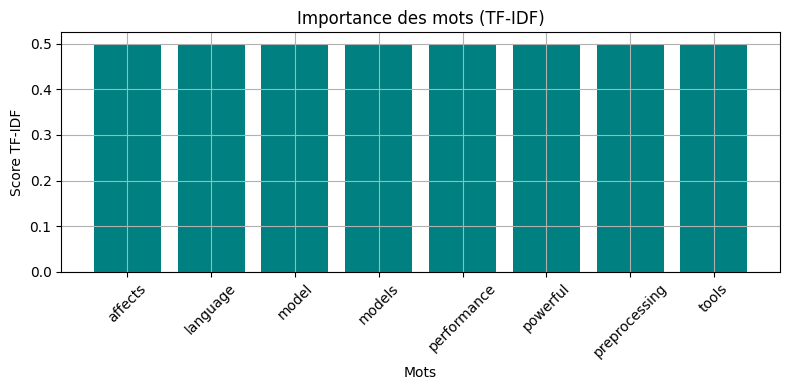

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Somme des scores TF-IDF pour chaque mot
tfidf_scores = X_tfidf.toarray().sum(axis=0)
features = tfidf.get_feature_names_out()

# Créer un DataFrame pour trier les mots par importance
import pandas as pd
tfidf_df = pd.DataFrame({'word': features, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

# Barplot
plt.figure(figsize=(8, 4))
plt.bar(tfidf_df['word'], tfidf_df['score'], color='teal')
plt.title("Importance des mots (TF-IDF)")
plt.xlabel("Mots")
plt.ylabel("Score TF-IDF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
